In [1]:
import time
import sys
sys.path.append('/gpfs/loomis/home.grace/ys668/software/koza4ok')
import uproot4 as uproot
import math
import importlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import root_numpy
import scipy
from joblib import dump, load
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn import datasets, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve
from skTMVA import convert_bdt_sklearn_tmva
import pickle

Welcome to JupyROOT 6.22/02


In [2]:
Crit2 = pd.read_pickle("./crit2.pkl")
Crit2

Crit2_RZRatio  Crit2_RZRatio_trackIds  Crit2_DeltaRho  \
entry subentry                                                          
0     0              1.021419                      -1       -4.738697   
      1              1.022302                      -1       -4.839012   
      2              1.304533                      -1      -17.746450   
      3              1.004187                     355        1.893636   
      4              1.594602                      -1      -26.755651   
...                       ...                     ...             ...   
49499 4              1.007454                      -1        2.785313   
      5              1.299637                      -1      -15.502758   
      6              1.299396                      -1      -15.427925   
      7              1.006945                      -1        2.691032   
      8              1.006917                      -1        2.640335   

                Crit2_DeltaRho_trackIds  Crit2_DeltaPhi  \
entry subentry                                            
0     0                              -1        0.801099   
      1                              -1        0.601002   
      2                              -1       19.210548   
      3                             355        3.855710   
      4                              -1       22.318817   
...                                 ...             ...   
49499 4                              -1        0.434769   
      5                              -1       12.340158   
      6                              -1       12.452241   
      7                              -1        0.081525   
      8                              -1        0.675205   

                Crit2_DeltaPhi_trackIds  Crit2_StraightTrackRatio  \
entry subentry                                                      
0     0                              -1                  0.691984   
      1                              -1                  0.688314   
      2                              -1                  0.409136   
      3                             355                  1.068689   
      4                              -1                  0.318865   
...                                 ...                       ...   
49499 4                              -1                  0.998189   
      5                              -1                  0.688496   
      6                              -1                  0.689373   
      7                              -1                  0.996621   
      8                              -1                  0.995380   

                Crit2_StraightTrackRatio_trackIds        pt  entry  subentry  
entry subentry                                                                
0     0                                        -1 -1.000000      0         0  
      1                                        -1 -1.000000      0         1  
      2                                        -1 -1.000000      0         2  
      3                                       355  0.003831      0         3  
      4                                        -1 -1.000000      0         4  
...                                           ...       ...    ...       ...  
49499 4                                        -1 -1.000000  49499         4  
      5                                        -1 -1.000000  49499         5  
      6                                        -1 -1.000000  49499         6  
      7                                        -1 -1.000000  49499         7  
      8                                        -1 -1.000000  49499         8  

[1314613 rows x 11 columns]

In [3]:
Crit3 = pd.read_pickle("./crit3.pkl")
Crit3

Crit3_3DAngle  Crit3_3DAngle_trackIds  Crit3_ChangeRZRatio  \
entry subentry                                                               
0     0              1.279950                     355             1.001022   
      1              5.687575                      -1             1.000026   
      2              5.623889                      -1             0.999895   
      3              0.006734                     364             1.000004   
      4              0.294426                      -1             0.999873   
...                       ...                     ...                  ...   
49498 2              0.185218                      21             1.000437   
49499 0              0.035954                       9             0.999926   
      1              1.053257                      -1             0.999591   
      2              0.133228                      -1             1.000170   
      3              2.018154                      -1             1.000533   

                Crit3_ChangeRZRatio_trackIds  Crit3_2DAngle  \
entry subentry                                                
0     0                                  355      12.743137   
      1                                   -1      35.945984   
      2                                   -1      30.794954   
      3                                  364       0.100589   
      4                                   -1       5.050444   
...                                      ...            ...   
49498 2                                   21       0.643643   
49499 0                                    9       0.037294   
      1                                   -1       8.654246   
      2                                   -1       0.889553   
      3                                   -1      16.856396   

                Crit3_2DAngle_trackIds        pt  entry  subentry  
entry subentry                                                     
0     0                            355  0.003831      0         0  
      1                             -1 -1.000000      0         1  
      2                             -1 -1.000000      0         2  
      3                            364  0.101608      0         3  
      4                             -1 -1.000000      0         4  
...                                ...       ...    ...       ...  
49498 2                             21  0.224072  49498         2  
49499 0                              9  0.455457  49499         0  
      1                             -1 -1.000000  49499         1  
      2                             -1 -1.000000  49499         2  
      3                             -1 -1.000000  49499         3  

[1118529 rows x 9 columns]

In [17]:
hit2_obs = {}
hit2_obs['true'] = Crit2[['Crit2_RZRatio', 'Crit2_DeltaRho', 'Crit2_DeltaPhi', 'Crit2_StraightTrackRatio','pt','entry','Crit2_DeltaPhi_trackIds']][Crit2.Crit2_DeltaPhi_trackIds != -1]
hit2_obs['false'] = Crit2[['Crit2_RZRatio', 'Crit2_DeltaRho', 'Crit2_DeltaPhi', 'Crit2_StraightTrackRatio','pt','entry','Crit2_DeltaPhi_trackIds']][Crit2.Crit2_DeltaPhi_trackIds == -1]

In [5]:
hit3_obs = {}
hit3_obs['true'] = Crit3[['Crit3_3DAngle', 'Crit3_ChangeRZRatio', 'Crit3_2DAngle','pt','entry','Crit3_3DAngle_trackIds']][Crit3.Crit3_3DAngle_trackIds != -1]
hit3_obs['false'] = Crit3[['Crit3_3DAngle', 'Crit3_ChangeRZRatio', 'Crit3_2DAngle','pt','entry','Crit3_3DAngle_trackIds']][Crit3.Crit3_3DAngle_trackIds == -1]

In [6]:
hit2_obs['true']

Crit2_RZRatio  Crit2_DeltaRho  Crit2_DeltaPhi  \
entry subentry                                                  
0     3              1.004187        1.893636        3.855710   
      5              1.001376        1.091055        1.453792   
      12             1.008266        2.937275        0.066963   
      19             1.015562        4.034168        0.237008   
      21             1.025971        0.940874       15.254162   
...                       ...             ...             ...   
49498 3              1.013310        2.491310        4.122238   
      4              1.013384        3.732044        0.563245   
      6              1.012941        3.661449        0.426217   
49499 0              1.007041        2.708027        0.178855   
      3              1.007116        2.734615        0.158911   

                Crit2_StraightTrackRatio        pt  entry  \
entry subentry                                              
0     3                         1.068689  0.003831      0   
      5                         0.978561  0.101608      0   
      12                        1.010298  3.582566      0   
      19                        1.016308  0.824441      0   
      21                        0.970933  0.004238      0   
...                                  ...       ...    ...   
49498 3                         0.986521  0.047005  49498   
      4                         1.008765  0.224072  49498   
      6                         1.006457  0.224072  49498   
49499 0                         0.996062  0.455457  49499   
      3                         0.996946  0.455457  49499   

                Crit2_DeltaPhi_trackIds  
entry subentry                           
0     3                             355  
      5                             364  
      12                              2  
      19                            365  
      21                            498  
...                                 ...  
49498 3                              52  
      4                              21  
      6                              21  
49499 0                               9  
      3                               9  

[275505 rows x 7 columns]

In [7]:
X2 = np.concatenate((hit2_obs['true'], hit2_obs['false']))
y2 = np.concatenate((np.ones(hit2_obs['true'].shape[0]),
                    np.zeros(hit2_obs['false'].shape[0])))
X3 = np.concatenate((hit3_obs['true'], hit3_obs['false']))
y3 = np.concatenate((np.ones(hit3_obs['true'].shape[0]),
                    np.zeros(hit3_obs['false'].shape[0])))

In [8]:
print(X2)

[[ 1.00418699e+00  1.89363575e+00  3.85571003e+00 ...  3.83052719e-03
   0.00000000e+00  3.55000000e+02]
 [ 1.00137591e+00  1.09105492e+00  1.45379210e+00 ...  1.01607896e-01
   0.00000000e+00  3.64000000e+02]
 [ 1.00826561e+00  2.93727493e+00  6.69631734e-02 ...  3.58256626e+00
   0.00000000e+00  2.00000000e+00]
 ...
 [ 1.29939640e+00 -1.54279251e+01  1.24522409e+01 ... -1.00000000e+00
   4.94990000e+04 -1.00000000e+00]
 [ 1.00694466e+00  2.69103241e+00  8.15251395e-02 ... -1.00000000e+00
   4.94990000e+04 -1.00000000e+00]
 [ 1.00691700e+00  2.64033508e+00  6.75205171e-01 ... -1.00000000e+00
   4.94990000e+04 -1.00000000e+00]]


In [9]:
print(X2[0])

[1.00418699e+00 1.89363575e+00 3.85571003e+00 1.06868887e+00
 3.83052719e-03 0.00000000e+00 3.55000000e+02]


In [10]:
print(X2[:,:-3])

[[  1.00418699   1.89363575   3.85571003   1.06868887]
 [  1.00137591   1.09105492   1.4537921    0.97856092]
 [  1.00826561   2.93727493   0.06696317   1.01029754]
 ...
 [  1.2993964  -15.42792511  12.45224094   0.68937302]
 [  1.00694466   2.69103241   0.08152514   0.99662113]
 [  1.006917     2.64033508   0.67520517   0.99537981]]


Train & test with crit2

In [11]:
# The Training and Testing Split, https://betatim.github.io/posts/sklearn-for-TMVA-users/
X2_dev,X2_eval, y2_dev,y2_eval = train_test_split(X2, y2,
                                              test_size=0.33, random_state=42)
X2_train,X2_test, y2_train,y2_test = train_test_split(X2_dev, y2_dev,
                                                  test_size=0.33, random_state=492)

In [12]:
# Read trained model from file
filename = 'bdt2.sav'
bdt2 = pickle.load(open(filename, 'rb'))

In [13]:
# Assessing a Classifier's Performance
y2_predicted = bdt2.predict(X2_test[:,:-3])
print (classification_report(y2_test, y2_predicted,
                            target_names=["fake", "real"]))
print ("Area under ROC curve: %.4f"%(roc_auc_score(y2_test,
                                                  bdt2.decision_function(X2_test[:,:-3]))))

              precision    recall  f1-score   support

        fake       0.91      0.94      0.93    229727
        real       0.74      0.66      0.70     60934

    accuracy                           0.88    290661
   macro avg       0.83      0.80      0.81    290661
weighted avg       0.88      0.88      0.88    290661

Area under ROC curve: 0.9207


Study efficiency as a function of pt

In [14]:
X2_test_df = pd.DataFrame(X2_test, columns=['Crit2_RZRatio','Crit2_DeltaRho','Crit2_DeltaPhi','Crit2_StraightTrackRatio','pt','entry','Crit2_DeltaPhi_trackIds'])
X2_test_df

,Crit2_RZRatio,Crit2_DeltaRho,Crit2_DeltaPhi,Crit2_StraightTrackRatio,pt,entry,Crit2_DeltaPhi_trackIds
0,1.008358,0.926146,12.088574,0.996240,-1.000000,12371.0,-1.0
1,1.701787,-31.279404,7.269985,0.236414,-1.000000,24225.0,-1.0
2,1.008858,2.705975,1.716181,0.990917,0.012028,16037.0,386.0
3,1.115777,10.732208,4.569150,1.192621,-1.000000,29839.0,-1.0
4,1.029402,3.541821,5.086046,0.995081,-1.000000,4588.0,-1.0
...,...,...,...,...,...,...,...
290656,1.682985,30.962444,3.715787,3.237307,-1.000000,16380.0,-1.0
290657,1.407985,-22.479115,3.586833,0.514516,-1.000000,22071.0,-1.0
290658,1.007919,2.847660,0.518288,0.997668,0.096145,14727.0,23.0
290659,1.004633,1.061531,3.805645,0.964387,0.016322,8391.0,150.0


In [15]:
X2_test_df['y2_predicted'] = y2_predicted
X2_test_df

,Crit2_RZRatio,Crit2_DeltaRho,Crit2_DeltaPhi,Crit2_StraightTrackRatio,pt,entry,Crit2_DeltaPhi_trackIds,y2_predicted
0,1.008358,0.926146,12.088574,0.996240,-1.000000,12371.0,-1.0,0.0
1,1.701787,-31.279404,7.269985,0.236414,-1.000000,24225.0,-1.0,0.0
2,1.008858,2.705975,1.716181,0.990917,0.012028,16037.0,386.0,0.0
3,1.115777,10.732208,4.569150,1.192621,-1.000000,29839.0,-1.0,0.0
4,1.029402,3.541821,5.086046,0.995081,-1.000000,4588.0,-1.0,0.0
...,...,...,...,...,...,...,...,...
290656,1.682985,30.962444,3.715787,3.237307,-1.000000,16380.0,-1.0,0.0
290657,1.407985,-22.479115,3.586833,0.514516,-1.000000,22071.0,-1.0,0.0
290658,1.007919,2.847660,0.518288,0.997668,0.096145,14727.0,23.0,1.0
290659,1.004633,1.061531,3.805645,0.964387,0.016322,8391.0,150.0,0.0


In [16]:
X2_test_df_true = X2_test_df[X2_test_df.pt != -1]
X2_test_df_true

,Crit2_RZRatio,Crit2_DeltaRho,Crit2_DeltaPhi,Crit2_StraightTrackRatio,pt,entry,Crit2_DeltaPhi_trackIds,y2_predicted
2,1.008858,2.705975,1.716181,0.990917,0.012028,16037.0,386.0,0.0
11,1.002797,1.615564,1.869013,1.018004,0.028460,558.0,778.0,0.0
17,1.000742,0.859449,1.108137,1.024383,0.473277,42332.0,14.0,0.0
21,1.035383,5.795671,5.015148,1.209635,0.015651,18097.0,491.0,0.0
22,1.044327,-6.390701,6.452774,0.694585,0.034571,5372.0,171.0,0.0
...,...,...,...,...,...,...,...,...
290638,1.021847,1.598511,5.226488,0.954514,0.036413,7496.0,136.0,0.0
290642,1.000268,0.485002,1.242425,0.982988,0.094977,6946.0,8.0,0.0
290647,1.006172,2.502918,0.618378,0.983890,0.101359,29813.0,37.0,0.0
290658,1.007919,2.847660,0.518288,0.997668,0.096145,14727.0,23.0,1.0


In [18]:
X2_test_df_true1 = X2_test_df_true.drop_duplicates(subset=['entry','Crit2_DeltaPhi_trackIds','y2_predicted']) 

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates

In [19]:
X2_test_df_true2 = X2_test_df_true1.sort_values(['y2_predicted'])
X2_test_df_true3 = X2_test_df_true2.sort_values(['entry', 'Crit2_DeltaPhi_trackIds'])
X2_test_df_true3

,Crit2_RZRatio,Crit2_DeltaRho,Crit2_DeltaPhi,Crit2_StraightTrackRatio,pt,entry,Crit2_DeltaPhi_trackIds,y2_predicted
112882,1.008237,2.945251,0.021816,1.008674,3.582566,0.0,2.0,1.0
93871,1.014120,3.825837,1.263530,1.164126,0.003831,0.0,355.0,0.0
38129,1.025971,0.940874,15.254162,0.970933,0.004238,0.0,498.0,0.0
28060,1.002356,1.567814,0.303342,0.992283,0.189340,3.0,25.0,1.0
137473,1.028741,5.504074,0.149083,1.044829,0.189384,5.0,318.0,0.0
...,...,...,...,...,...,...,...,...
35268,1.001602,1.282604,0.442992,1.000266,0.077004,49495.0,95.0,1.0
246026,1.004277,1.977497,1.038202,0.970905,0.001169,49496.0,306.0,0.0
194704,1.009822,3.064030,1.883233,1.030127,0.001688,49496.0,348.0,0.0
71849,1.002702,-1.398968,1.894134,0.889168,0.010292,49497.0,21.0,0.0


In [20]:
X2_test_df_true_no_dup = X2_test_df_true3.drop_duplicates(subset=['entry','Crit2_DeltaPhi_trackIds'], keep='last') 

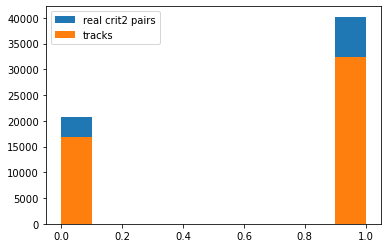

In [21]:
plt.hist(X2_test_df_true['y2_predicted'], label='real crit2 pairs')
plt.hist(X2_test_df_true_no_dup['y2_predicted'], label='tracks')
plt.legend()

In [22]:
def getRanges(edges):
    return list(zip(edges[:-1], edges[1:]))

In [23]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [24]:
def applyCuts(df, pt_edges):
    pt_ranges = getRanges(pt_edges)
    ds = ['' for j in range(0,len(pt_ranges))]
    for i in range(0,len(pt_ranges)):
        pt_low, pt_high = pt_ranges[i]
        ds[i] = applyCut(df, 'pt > ' + str(pt_low) + 'and pt < ' + str(pt_high), str(pt_low) + ' < pt < ' + str(pt_high)+' GeV')
    return pt_ranges, ds

In [25]:
pt_ranges, X2_test_df_true_no_dup_array = applyCuts(X2_test_df_true_no_dup, \
                                                    np.concatenate([np.arange(0,2.1,0.1), np.array([3,4,5,10,20])]))

0.0 < pt < 0.1 GeV 15814  fraction kept: 32.1
0.1 < pt < 0.2 GeV 7328  fraction kept: 14.9
0.2 < pt < 0.30000000000000004 GeV 5805  fraction kept: 11.8
0.30000000000000004 < pt < 0.4 GeV 4408  fraction kept: 8.9
0.4 < pt < 0.5 GeV 3145  fraction kept: 6.4
0.5 < pt < 0.6000000000000001 GeV 2165  fraction kept: 4.4
0.6000000000000001 < pt < 0.7000000000000001 GeV 1385  fraction kept: 2.8
0.7000000000000001 < pt < 0.8 GeV 1079  fraction kept: 2.2
0.8 < pt < 0.9 GeV 650  fraction kept: 1.3
0.9 < pt < 1.0 GeV 496  fraction kept: 1.0
1.0 < pt < 1.1 GeV 350  fraction kept: 0.7
1.1 < pt < 1.2000000000000002 GeV 248  fraction kept: 0.5
1.2000000000000002 < pt < 1.3 GeV 160  fraction kept: 0.3
1.3 < pt < 1.4000000000000001 GeV 142  fraction kept: 0.3
1.4000000000000001 < pt < 1.5 GeV 139  fraction kept: 0.3
1.5 < pt < 1.6 GeV 131  fraction kept: 0.3
1.6 < pt < 1.7000000000000002 GeV 102  fraction kept: 0.2
1.7000000000000002 < pt < 1.8 GeV 119  fraction kept: 0.2
1.8 < pt < 1.9000000000000001 Ge

In [26]:
print(pt_ranges)

[(0.0, 0.1), (0.1, 0.2), (0.2, 0.30000000000000004), (0.30000000000000004, 0.4), (0.4, 0.5), (0.5, 0.6000000000000001), (0.6000000000000001, 0.7000000000000001), (0.7000000000000001, 0.8), (0.8, 0.9), (0.9, 1.0), (1.0, 1.1), (1.1, 1.2000000000000002), (1.2000000000000002, 1.3), (1.3, 1.4000000000000001), (1.4000000000000001, 1.5), (1.5, 1.6), (1.6, 1.7000000000000002), (1.7000000000000002, 1.8), (1.8, 1.9000000000000001), (1.9000000000000001, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, 5.0), (5.0, 10.0), (10.0, 20.0)]


In [27]:
x, _ = np.histogram(X2_test_df_true_no_dup_array[0]['y2_predicted'], bins=2)
print(x)
print(x[1]/(x[0]+x[1]))

[12146  3668]
0.23194637662830403


In [28]:
for i in range(0, len(X2_test_df_true_no_dup_array)):
    print(pt_ranges[i], 'GeV:')
    x, _ = np.histogram(X2_test_df_true_no_dup_array[i]['y2_predicted'], bins=2)
    print('total number of tracks:', x[0]+x[1])
    print('efficiency:', x[1]/(x[0]+x[1]), '\n')

(0.0, 0.1) GeV:
total number of tracks: 15814
efficiency: 0.23194637662830403 

(0.1, 0.2) GeV:
total number of tracks: 7328
efficiency: 0.7117903930131004 

(0.2, 0.30000000000000004) GeV:
total number of tracks: 5805
efficiency: 0.8373815676141257 

(0.30000000000000004, 0.4) GeV:
total number of tracks: 4408
efficiency: 0.8777223230490018 

(0.4, 0.5) GeV:
total number of tracks: 3145
efficiency: 0.8868044515103338 

(0.5, 0.6000000000000001) GeV:
total number of tracks: 2165
efficiency: 0.8937644341801386 

(0.6000000000000001, 0.7000000000000001) GeV:
total number of tracks: 1385
efficiency: 0.8924187725631769 

(0.7000000000000001, 0.8) GeV:
total number of tracks: 1079
efficiency: 0.9091751621872104 

(0.8, 0.9) GeV:
total number of tracks: 650
efficiency: 0.9138461538461539 

(0.9, 1.0) GeV:
total number of tracks: 496
efficiency: 0.8991935483870968 

(1.0, 1.1) GeV:
total number of tracks: 350
efficiency: 0.8971428571428571 

(1.1, 1.2000000000000002) GeV:
total number of trac

In [29]:
eff_array = []
for i in range(0, len(X2_test_df_true_no_dup_array)):
    x, _ = np.histogram(X2_test_df_true_no_dup_array[i]['y2_predicted'], bins=2)
    eff_array.append(x[1]/(x[0]+x[1]))

In [30]:
pt_edges = np.concatenate([np.arange(0,2.1,0.1), np.array([3,4,5,10,20])])
pt_center = []
for i in range(0,len(pt_edges)-1):
    pt_center.append((pt_edges[i] + pt_edges[i+1]) / 2)

In [31]:
def getInterval(arrayFloat):
    interval = np.zeros(len(arrayFloat)-1)
    for i in range(0,len(arrayFloat)-1):
        interval[i] = arrayFloat[i+1] - arrayFloat[i]
    return interval

In [32]:
xerr = getInterval(pt_edges)/2

Train and test with crit3

In [33]:
X3_dev,X3_eval, y3_dev, y3_eval = train_test_split(X3, y3,
                                              test_size=0.33, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_dev, y3_dev,
                                                  test_size=0.33, random_state=492)

In [169]:
# Training Decision Trees
clf = svm.SVC()
dt = DecisionTreeClassifier(max_depth=3)
bdt3 = AdaBoostClassifier(dt,
                         algorithm='SAMME',
                         n_estimators=800,
                         learning_rate=0.5)
bdt3.fit(X3_train[:,:-3], y3_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=800)

In [187]:
# Save the model to file, https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'bdt3.sav'
pickle.dump(bdt3, open(filename, 'wb'))

In [34]:
# Reading the model from file
filename = 'bdt3.sav'
bdt3 = pickle.load(open(filename, 'rb'))

In [35]:
y3_predicted = bdt3.predict(X3_test[:,:-3])
print (classification_report(y3_test, y3_predicted,
                            target_names=["fake", "real"]))
print ("Area under ROC curve: %.4f"%(roc_auc_score(y3_test,
                                                  bdt3.decision_function(X3_test[:,:-3]))))

              precision    recall  f1-score   support

        fake       0.97      0.97      0.97    214600
        real       0.83      0.79      0.81     32707

    accuracy                           0.95    247307
   macro avg       0.90      0.88      0.89    247307
weighted avg       0.95      0.95      0.95    247307

Area under ROC curve: 0.9672


Study efficiency for Crit3

In [36]:
X3_test_df = pd.DataFrame(X3_test, columns=['Crit3_3DAngle', 'Crit3_ChangeRZRatio', 'Crit3_2DAngle','pt','entry','Crit3_3DAngle_trackIds'])
X3_test_df['y3_predicted'] = y3_predicted
X3_test_df

,Crit3_3DAngle,Crit3_ChangeRZRatio,Crit3_2DAngle,pt,entry,Crit3_3DAngle_trackIds,y3_predicted
0,19.628759,1.026394,55.269020,-1.000000,46649.0,-1.0,0.0
1,0.644774,1.000458,4.112186,-1.000000,8006.0,-1.0,0.0
2,2.109856,1.001125,16.531248,-1.000000,20538.0,-1.0,0.0
3,16.503164,0.970672,84.359268,-1.000000,20092.0,-1.0,0.0
4,8.884122,1.024705,29.922354,-1.000000,17486.0,-1.0,0.0
...,...,...,...,...,...,...,...
247302,0.035980,0.999978,0.083298,-1.000000,43106.0,-1.0,1.0
247303,8.231765,0.998467,47.371670,-1.000000,35552.0,-1.0,0.0
247304,10.305409,1.009760,84.404533,-1.000000,16385.0,-1.0,0.0
247305,0.133737,1.000073,1.307048,0.260679,23177.0,5.0,1.0


In [37]:
X3_test_df_true = X3_test_df[X3_test_df.pt != -1]
X3_test_df_true

,Crit3_3DAngle,Crit3_ChangeRZRatio,Crit3_2DAngle,pt,entry,Crit3_3DAngle_trackIds,y3_predicted
6,0.046174,0.999942,0.304473,0.251354,12846.0,3.0,1.0
9,0.178751,1.000464,0.115304,0.174295,20928.0,36.0,1.0
28,0.044180,1.000040,0.314887,0.337973,996.0,27.0,1.0
32,0.018954,0.999995,0.578036,0.566058,36688.0,18.0,1.0
43,0.109819,1.000181,0.584565,0.439684,33539.0,55.0,1.0
...,...,...,...,...,...,...,...
247291,0.013277,1.000010,0.077808,0.597120,38115.0,23.0,1.0
247292,0.076056,1.000041,0.815639,0.585433,12144.0,24.0,1.0
247299,0.035474,0.999953,0.222166,3.912019,11718.0,2.0,1.0
247305,0.133737,1.000073,1.307048,0.260679,23177.0,5.0,1.0


In [38]:
X3_test_df_true1 = X3_test_df_true.drop_duplicates(subset=['entry','Crit3_3DAngle_trackIds','y3_predicted']) 

In [39]:
X3_test_df_true2 = X3_test_df_true1.sort_values(['y3_predicted'])
X3_test_df_true3 = X3_test_df_true2.sort_values(['entry', 'Crit3_3DAngle_trackIds'])
X3_test_df_true3

,Crit3_3DAngle,Crit3_ChangeRZRatio,Crit3_2DAngle,pt,entry,Crit3_3DAngle_trackIds,y3_predicted
43127,0.006734,1.000004,0.100589,0.101608,0.0,364.0,1.0
104915,0.032365,1.000103,0.066958,5.704576,5.0,1.0,1.0
113478,0.088459,1.000069,0.397497,0.240481,6.0,15.0,1.0
202825,0.043132,1.000007,1.892785,0.659125,6.0,197.0,1.0
11768,0.681204,1.000233,12.132840,0.007388,6.0,210.0,0.0
...,...,...,...,...,...,...,...
13733,0.029055,0.999992,0.641244,3.082802,49493.0,1.0,1.0
105618,0.051449,1.000046,0.430020,0.379485,49494.0,1173.0,1.0
163465,32.246277,0.941324,32.134884,0.001688,49496.0,348.0,0.0
124226,0.185218,1.000437,0.643643,0.224072,49498.0,21.0,1.0


In [40]:
X3_test_df_true_no_dup = X3_test_df_true3.drop_duplicates(subset=['entry','Crit3_3DAngle_trackIds'], keep='last') 

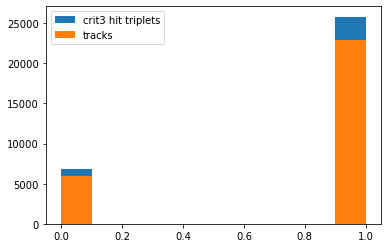

In [41]:
plt.hist(X3_test_df_true['y3_predicted'], label='crit3 hit triplets')
plt.hist(X3_test_df_true_no_dup['y3_predicted'], label='tracks')
plt.legend()

In [42]:
pt_ranges, X3_test_df_true_no_dup_array = applyCuts(X3_test_df_true_no_dup, \
                                                    np.concatenate([np.arange(0,2.1,0.1), np.array([3,4,5,10,20])]))

0.0 < pt < 0.1 GeV 6343  fraction kept: 22.0
0.1 < pt < 0.2 GeV 4546  fraction kept: 15.8
0.2 < pt < 0.30000000000000004 GeV 3785  fraction kept: 13.1
0.30000000000000004 < pt < 0.4 GeV 2925  fraction kept: 10.1
0.4 < pt < 0.5 GeV 2185  fraction kept: 7.6
0.5 < pt < 0.6000000000000001 GeV 1389  fraction kept: 4.8
0.6000000000000001 < pt < 0.7000000000000001 GeV 991  fraction kept: 3.4
0.7000000000000001 < pt < 0.8 GeV 708  fraction kept: 2.5
0.8 < pt < 0.9 GeV 443  fraction kept: 1.5
0.9 < pt < 1.0 GeV 312  fraction kept: 1.1
1.0 < pt < 1.1 GeV 257  fraction kept: 0.9
1.1 < pt < 1.2000000000000002 GeV 173  fraction kept: 0.6
1.2000000000000002 < pt < 1.3 GeV 112  fraction kept: 0.4
1.3 < pt < 1.4000000000000001 GeV 107  fraction kept: 0.4
1.4000000000000001 < pt < 1.5 GeV 113  fraction kept: 0.4
1.5 < pt < 1.6 GeV 87  fraction kept: 0.3
1.6 < pt < 1.7000000000000002 GeV 86  fraction kept: 0.3
1.7000000000000002 < pt < 1.8 GeV 76  fraction kept: 0.3
1.8 < pt < 1.9000000000000001 GeV 69 

In [43]:
for i in range(0, len(X3_test_df_true_no_dup_array)):
    print(pt_ranges[i], 'GeV:')
    x, _ = np.histogram(X3_test_df_true_no_dup_array[i]['y3_predicted'], bins=2)
    print('total number of tracks:', x[0]+x[1])
    print('efficiency:', x[1]/(x[0]+x[1]), '\n')

(0.0, 0.1) GeV:
total number of tracks: 6343
efficiency: 0.28961059435598296 

(0.1, 0.2) GeV:
total number of tracks: 4546
efficiency: 0.797404311482622 

(0.2, 0.30000000000000004) GeV:
total number of tracks: 3785
efficiency: 0.9310435931307794 

(0.30000000000000004, 0.4) GeV:
total number of tracks: 2925
efficiency: 0.9671794871794872 

(0.4, 0.5) GeV:
total number of tracks: 2185
efficiency: 0.9762013729977117 

(0.5, 0.6000000000000001) GeV:
total number of tracks: 1389
efficiency: 0.9884809215262779 

(0.6000000000000001, 0.7000000000000001) GeV:
total number of tracks: 991
efficiency: 0.9868819374369324 

(0.7000000000000001, 0.8) GeV:
total number of tracks: 708
efficiency: 0.9929378531073446 

(0.8, 0.9) GeV:
total number of tracks: 443
efficiency: 1.0 

(0.9, 1.0) GeV:
total number of tracks: 312
efficiency: 1.0 

(1.0, 1.1) GeV:
total number of tracks: 257
efficiency: 0.9961089494163424 

(1.1, 1.2000000000000002) GeV:
total number of tracks: 173
efficiency: 1.0 

(1.20000

In [44]:
eff_array3 = []
for i in range(0, len(X3_test_df_true_no_dup_array)):
    x, _ = np.histogram(X3_test_df_true_no_dup_array[i]['y3_predicted'], bins=2)
    eff_array3.append(x[1]/(x[0]+x[1]))

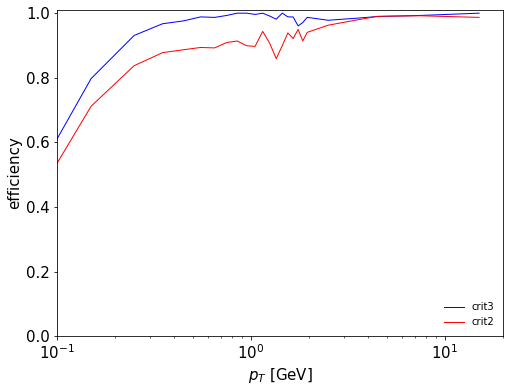

In [45]:
fig = plt.figure(figsize=(8,6))
plt.plot(pt_center, eff_array3, color='b', linewidth=1, label='crit3')
plt.plot(pt_center, eff_array, color='r', linewidth=1, label='crit2')
plt.xticks(np.arange(0,21), fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$p_T$ [GeV]', fontsize=15)
plt.ylabel('efficiency', fontsize=15)
plt.ylim(bottom=0, top=1.01)
plt.xlim(left=0.1, right=20)
plt.xscale('log')
plt.legend(loc='lower right', frameon=False)

In [186]:
convert_bdt_sklearn_tmva(bdt3, [('Crit3_3DAngle', 'F'), ('Crit3_ChangeRZRatio', 'F'), ('Crit3_2DAngle', 'F')], './bdt3.xml')